In [1]:
import ampal
import isambard
import isambard.specifications as specs
import isambard.modelling as modelling
import isambard.optimisation.evo_optimizers as ev_opts
from isambard.optimisation.evo_optimizers import Parameter
import budeff

import matplotlib.pyplot as plt
import numpy as np
import itertools
from pprint import pprint
import nglview as nv
from contextlib import redirect_stdout

%matplotlib inline

In [2]:
def show_ball_and_stick(ampal):
    view = nv.show_text(ampal.pdb)
    view.add_ball_and_stick()
    view.remove_cartoon()
    return view

In [3]:
REGISTER_ADJUST = {
    'a': 0,
    'b': 102.8,
    'c': 205.6,
    'd': 308.4,
    'e': 51.4,
    'f': 154.2,
    'g': 257
}

In [4]:
specification = specs.CoiledCoil.from_parameters

In [5]:
sequences = ['GEIAALKQEIAALKKEAAALKWEIAALKQGYY', 'GEIAALKQEIAALKKEAAALKWEIAALKQGYY']

In [6]:
parameters = [
    Parameter.static('Oligomeric State', 2),
    Parameter.static('Helix Length', 32),
    Parameter.dynamic('Radius', 5.0, 1.0),
    Parameter.dynamic('Pitch', 200, 60),
    Parameter.dynamic('PhiCA', REGISTER_ADJUST['g'], 27),  
]

In [7]:
default_values = [x.default_value for x in parameters]
print(default_values)

[2, 32, 5.0, 200, 257]


In [8]:
def get_bude_total_energy(ampal_object):
    return budeff.get_internal_energy(ampal_object).total_energy

### Genetic Algorithm

In [9]:
opt_ga = ev_opts.GA(specification, sequences, parameters, get_bude_total_energy)

In [10]:
opt_ga.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max     
0  	57   	-905.868	37.0221	-989.149	-844.767
1  	64   	-939.005	27.1555	-995.06 	-889.345
2  	71   	-961.159	18.134 	-999.013	-932.827
3  	67   	-978.32 	8.50623	-999.664	-959.821
4  	76   	-987.233	5.63539	-1000.24	-978.03 
5  	81   	-992.489	3.95353	-1001.19	-986.913
6  	55   	-995.254	3.14981	-1001.39	-989.666
7  	65   	-997.898	1.93222	-1002.35	-994.564
8  	69   	-999.085	1.51747	-1002.35	-996.227
9  	62   	-999.434	1.37473	-1002.35	-996.692
10 	68   	-1000.1 	1.14969	-1002.35	-997.992
11 	76   	-1000.9 	0.929162	-1002.4 	-999.156
12 	56   	-1001.29	0.793058	-1002.59	-999.827
13 	72   	-1001.81	0.553364	-1002.59	-1000.72
14 	74   	-1002.17	0.344073	-1002.64	-1001.27
15 	59   	-1002.34	0.173179	-1002.64	-1001.81
16 	65   	-1002.44	0.113814	-1002.66	-1002.26
17 	75   	-1002.51	0.0910287	-1002.66	-1002.35
18 	70   	-1002.57	0.0622145	-1002.69	-1002.43
19 	64   	-1002.61	0.0293354	-1002.69	-1002.55
20 	72   	-1002.63	0.022302 	-1002.69	-1002

In [11]:
optimized_model_ga = opt_ga.best_model

In [12]:
budeff.get_internal_energy(optimized_model_ga).total_energy

-1002.9866545995004

In [13]:
funnel_data_ga = opt_ga.make_energy_funnel_data()

In [14]:
xs = [x[0] for x in funnel_data_ga]
ys = [x[1] for x in funnel_data_ga]
zs = [x[2] for x in funnel_data_ga]

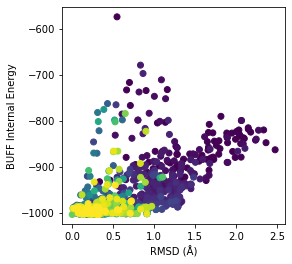

In [15]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('ga.png')

In [16]:
f = open('d_CC-Di-A17-optimized-model-ga.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_ga.pdb)

### Differential Evolution

In [17]:
opt_de = ev_opts.DE(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [18]:
opt_de.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max    
0  	100  	-906.946	45.0418	-990.667	-760.34
1  	100  	-932.248	38.5023	-995.768	-829.092
2  	100  	-951.95 	28.5686	-995.768	-849.093
3  	100  	-963.092	21.8414	-996.051	-895.143
4  	100  	-971.392	17.3506	-1000.88	-914.699
5  	100  	-977.858	13.6055	-1000.88	-921.082
6  	100  	-982.933	9.50318	-1000.88	-953.096
7  	100  	-987.267	6.54702	-1002.15	-967.338
8  	100  	-990.52 	4.93186	-1002.15	-978.281
9  	100  	-992.652	4.12573	-1002.15	-980.931
10 	100  	-994.249	4.11002	-1002.35	-983.633
11 	100  	-995.835	3.30813	-1002.35	-987.307
12 	100  	-997.029	3.03502	-1002.35	-990.019
13 	100  	-998.168	2.42725	-1002.43	-991.856
14 	100  	-999.184	1.86982	-1002.52	-992.625
15 	100  	-999.982	1.57976	-1002.71	-995.465
16 	100  	-1000.72	1.25145	-1003.8 	-996.992
17 	100  	-1001.17	1.06762	-1003.8 	-998.751
18 	100  	-1001.62	0.919057	-1003.83	-998.751
19 	100  	-1001.89	0.893197	-1004.07	-998.924
20 	100  	-1002.12	0.688442	-1004.07	-999.85 
21 	100  

In [19]:
optimized_model_de = opt_de.best_model
budeff.get_internal_energy(optimized_model_de).total_energy

-1005.134888550541

In [20]:
funnel_data_de = opt_de.make_energy_funnel_data()

In [21]:
xs = [x[0] for x in funnel_data_de]
ys = [x[1] for x in funnel_data_de]
zs = [x[2] for x in funnel_data_de]

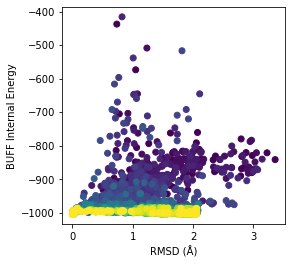

In [22]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('de.png')

In [23]:
f = open('d_CC-Di--A17-optimized-model-de.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_de.pdb)

### Particle Swarm Optimisation

In [24]:
opt_pso = ev_opts.PSO(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [25]:
opt_pso.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max     
0  	100  	-890.888	91.9941	-1006.13	-440.673
1  	81   	-901.678	151.994	-1006.13	-104.093
2  	44   	-903.716	149.527	-1006.37	-104.093
3  	57   	-889.539	84.1261	-1006.37	-380.923
4  	88   	-869.084	45.924 	-998.815	-634.465
5  	89   	-902.445	79.4854	-1005.75	-495.464
6  	82   	-886.47 	161.596	-1005.75	-270.831
7  	44   	-845.388	205.644	-1007.17	-192.424
8  	57   	-854.927	161.928	-1007.17	-192.424
9  	93   	-892.396	46.2267	-1005.75	-719.58 
10 	98   	-914.384	85.0931	-1002.88	-501.869
11 	74   	-891.021	165.393	-1003.82	55.5869 
12 	44   	-881.195	155.97 	-1003.82	55.5869 
13 	78   	-866.136	139.002	-999.793	55.5869 
14 	93   	-894.01 	109.656	-999.793	55.5869 
15 	84   	-926.653	112.365	-1005.95	55.5869 
16 	71   	-838.94 	215.931	-1005.95	55.5869 
17 	31   	-805.157	230.196	-1005.95	55.5869 
18 	39   	-830.125	212.812	-1005.95	55.5869 
19 	69   	-880.355	167.808	-1005.95	55.5869 
20 	75   	-888.664	129.011	-1005.95	-355.195
21 	61   	

In [26]:
optimized_model_pso = opt_pso.best_model
budeff.get_internal_energy(optimized_model_pso).total_energy

-1007.1704473467081

In [27]:
funnel_data_pso = opt_pso.make_energy_funnel_data()

In [28]:
xs = [x[0] for x in funnel_data_pso]
ys = [x[1] for x in funnel_data_pso]
zs = [x[2] for x in funnel_data_pso]

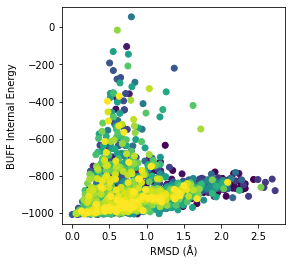

In [29]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('pso.png')

In [30]:
f = open('d_CC-Di-A17-optimized-model-pso.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_pso.pdb)

### Covariance Matrix Adaptive Evolutionary Strategy

In [31]:
opt_cmaes = ev_opts.CMAES(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [32]:
opt_cmaes.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min    	max     
0  	100  	-882.715	37.4077	-982.47	-717.323
1  	100  	-903.516	39.8255	-990.475	-741.544
2  	100  	-934.621	49.923 	-1000.49	-795.936
3  	100  	-957.596	34.4836	-998.696	-823.124
4  	100  	-984.721	7.27765	-1003.26	-963.037
5  	100  	-988.76 	7.64222	-1002.27	-945.446
6  	100  	-988.753	13.0577	-1003.57	-924.545
7  	100  	-994.082	4.48937	-1003.25	-984.812
8  	100  	-994.492	4.79297	-1003.01	-984.498
9  	100  	-996.218	4.1559 	-1001.94	-979.225
10 	100  	-996.454	4.71847	-1002.09	-983.265
11 	100  	-997.886	4.18265	-1002.33	-984.758
12 	100  	-999.186	3.59512	-1003.14	-984.545
13 	100  	-1000.47	2.96416	-1002.9 	-984.988
14 	100  	-1001.25	1.1894 	-1003.08	-998.275
15 	100  	-1002.15	0.869451	-1003.19	-998.616
16 	100  	-1001.66	1.38084 	-1003.25	-998.982
17 	100  	-1002.26	1.20402 	-1003.23	-998.924
18 	100  	-1002.09	1.46498 	-1003.27	-999.21 
19 	100  	-1002.59	1.14435 	-1003.28	-999.115
20 	100  	-1002.65	1.14176 	-1003.28	-999.255
21 	10

In [33]:
optimized_model_cmaes = opt_cmaes.best_model
budeff.get_internal_energy(optimized_model_cmaes).total_energy

-1003.5723924028049

In [34]:
funnel_data_cmaes = opt_cmaes.make_energy_funnel_data()

In [35]:
xs = [x[0] for x in funnel_data_cmaes]
ys = [x[1] for x in funnel_data_cmaes]
zs = [x[2] for x in funnel_data_cmaes]

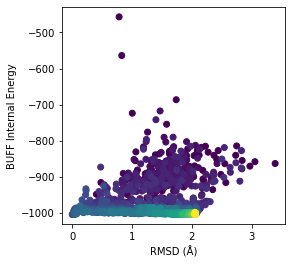

In [36]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('cmaes.png')

In [37]:
f = open('d_CC-Di-A17-optimized-model-cmaes.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_cmaes.pdb)